🎯 ВВЕДИТЕ ТИКЕРЫ АКЦИЙ ДЛЯ АНАЛИЗА
Примеры: AAPL, TSLA, GOOGL, MSFT, AMZN, META, NVDA, NFLX
Разделяйте символы запятыми или пробелами
Оставьте пустым для использования акций по умолчанию
Введите символы акций: 
Используются акции по умолчанию: AAPL, GOOGL, MSFT, AMZN

ПРОВЕРКА ДОСТУПНОСТИ АКЦИЙ...
	✅ AAPL: доступен
	✅ GOOGL: доступен
	✅ MSFT: доступен
	✅ AMZN: доступен

📊 ДАШБОРД АНАЛИЗА АКЦИЙ
	Дата создания: 2025-10-16 00:25:18
	Анализируемые акции: AAPL, GOOGL, MSFT, AMZN
	Бенчмарк: S&P 500
📥 Загрузка данных с Yahoo Finance...
	✅ AAPL: загружено 502 дней
	✅ GOOGL: загружено 502 дней
	✅ MSFT: загружено 502 дней
	✅ AMZN: загружено 502 дней
	✅ ^GSPC: загружено 502 дней
🔧 Обработка пропущенных значений...
	✅ Пропущенные значения отсутствуют
📈 Периоды для расчета процентного роста
	Текущая дата: 2025-10-15
	День: с 2025-10-14
	Неделя: с 2025-10-08
	Месяц: с 2025-09-15
	Год: с 2024-10-15

🔍 ВЕРИФИКАЦИЯ ДАННЫХ
✅ Apple: наш расчет 7.12% vs Yahoo 8.08% (разница: 0.96%)
✅ Google: наш расчет 52

,Компания,День,Неделя,Месяц,Год
AAPL,Apple,+0.63%,-3.38%,+5.34%,+7.12%
GOOGL,Google,+2.27%,+2.62%,-0.23%,+52.39%
MSFT,Microsoft,-0.03%,-2.18%,-0.37%,+23.53%
AMZN,Amazon,-0.38%,-4.28%,-6.85%,+14.85%
^GSPC,S&P 500,+0.40%,-1.22%,+0.84%,+14.72%



🔥 СРАВНЕНИЕ С РЫНКОМ (S&P 500)


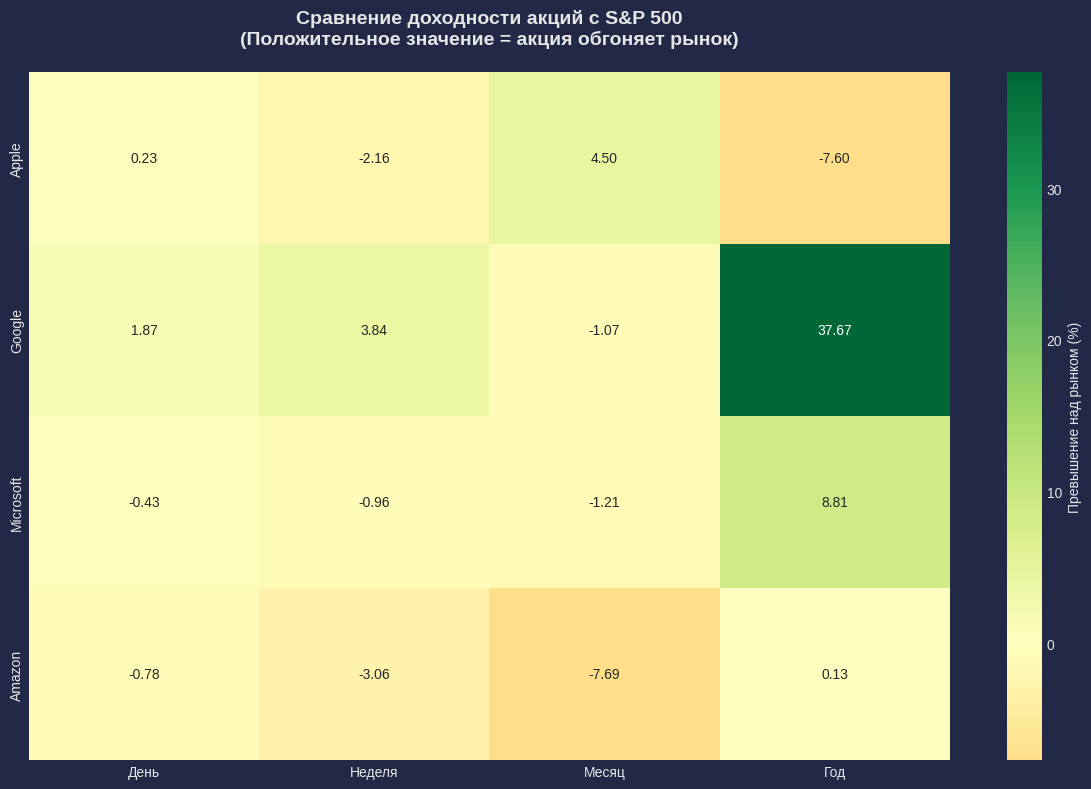


💰 СВОДКА ЦЕН ПО ПЕРИОДАМ


,Символ,Компания,Текущая,День назад,Неделю назад,Месяц назад,Год назад
0,AAPL,Apple,$249.34,$247.77,$258.06,$236.70,$232.77
1,GOOGL,Google,$251.03,$245.45,$244.62,$251.61,$164.73
2,MSFT,Microsoft,$513.43,$513.57,$524.85,$515.36,$415.62
3,AMZN,Amazon,$215.57,$216.39,$225.22,$231.43,$187.69
4,^GSPC,S&P 500,$6671.06,$6644.31,$6753.72,$6615.28,$5815.26



🏆 ЛУЧШИЕ И ХУДШИЕ АКЦИИ ПО РОСТУ
📈 ЛУЧШИЕ ПЕРФОРМЕРЫ:
   За год: Google (+52.39%)
   За месяц: Apple (+5.34%)

📉 ХУДШИЕ ПЕРФОРМЕРЫ:
   За год: Apple (+7.12%)
   За месяц: Amazon (-6.85%)

📊 РЫНОК (S&P 500):
   За год: +14.72%
   За месяц: +0.84%

📈 ГРАФИКИ ИЗМЕНЕНИЯ ЦЕН АКЦИЙ


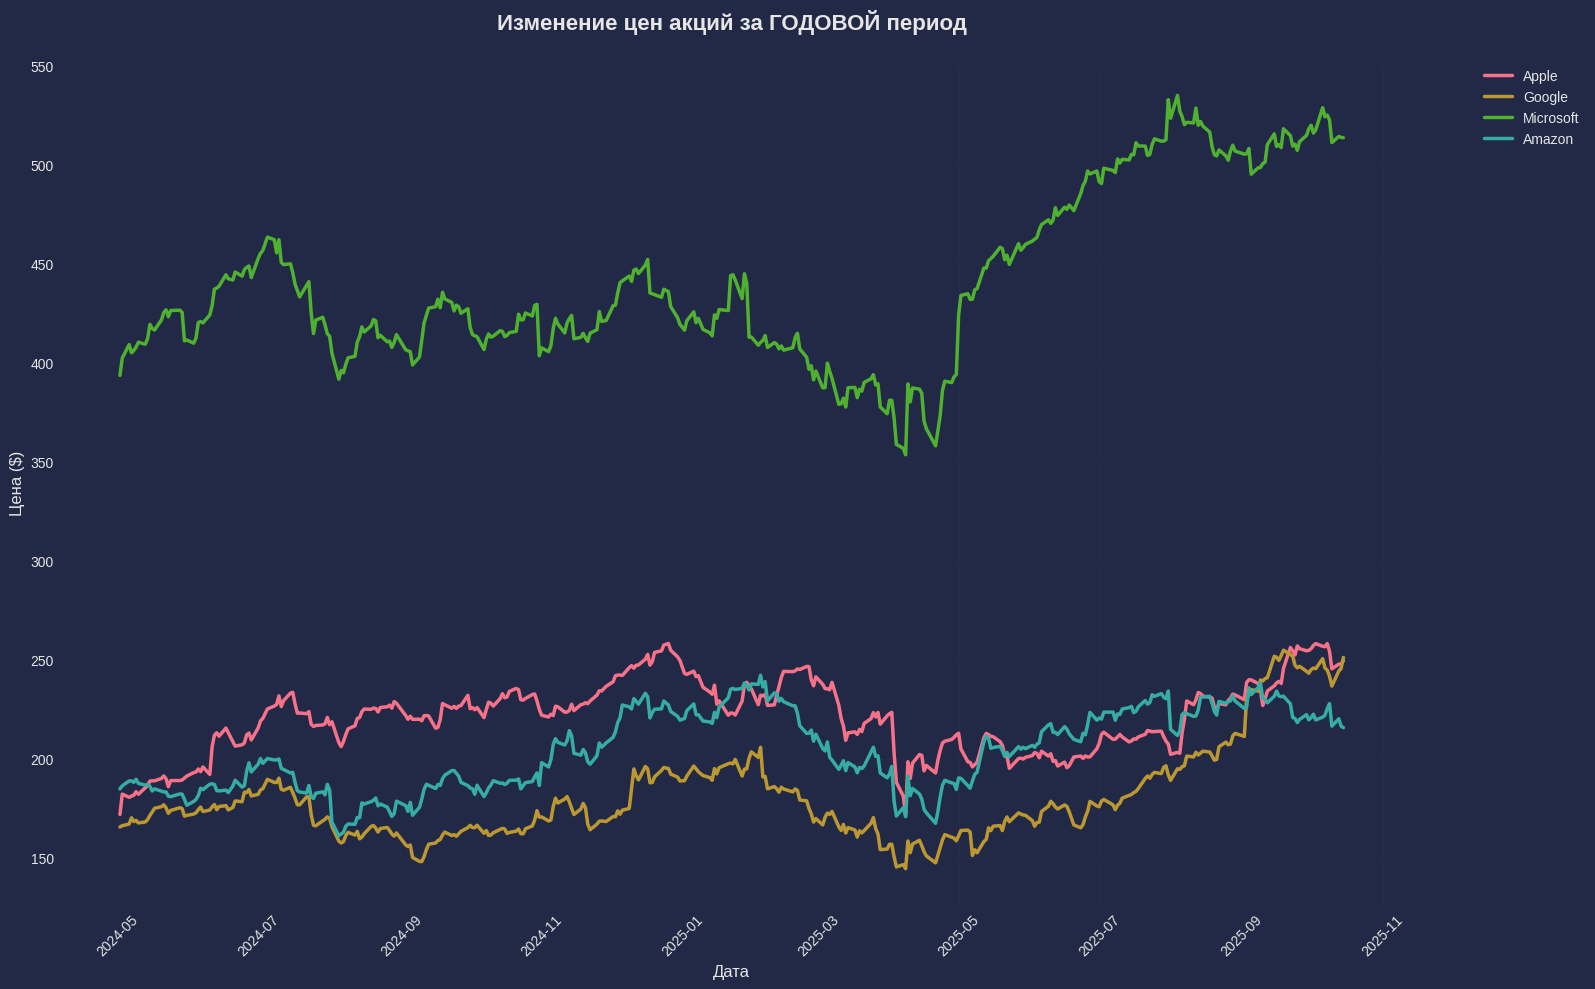

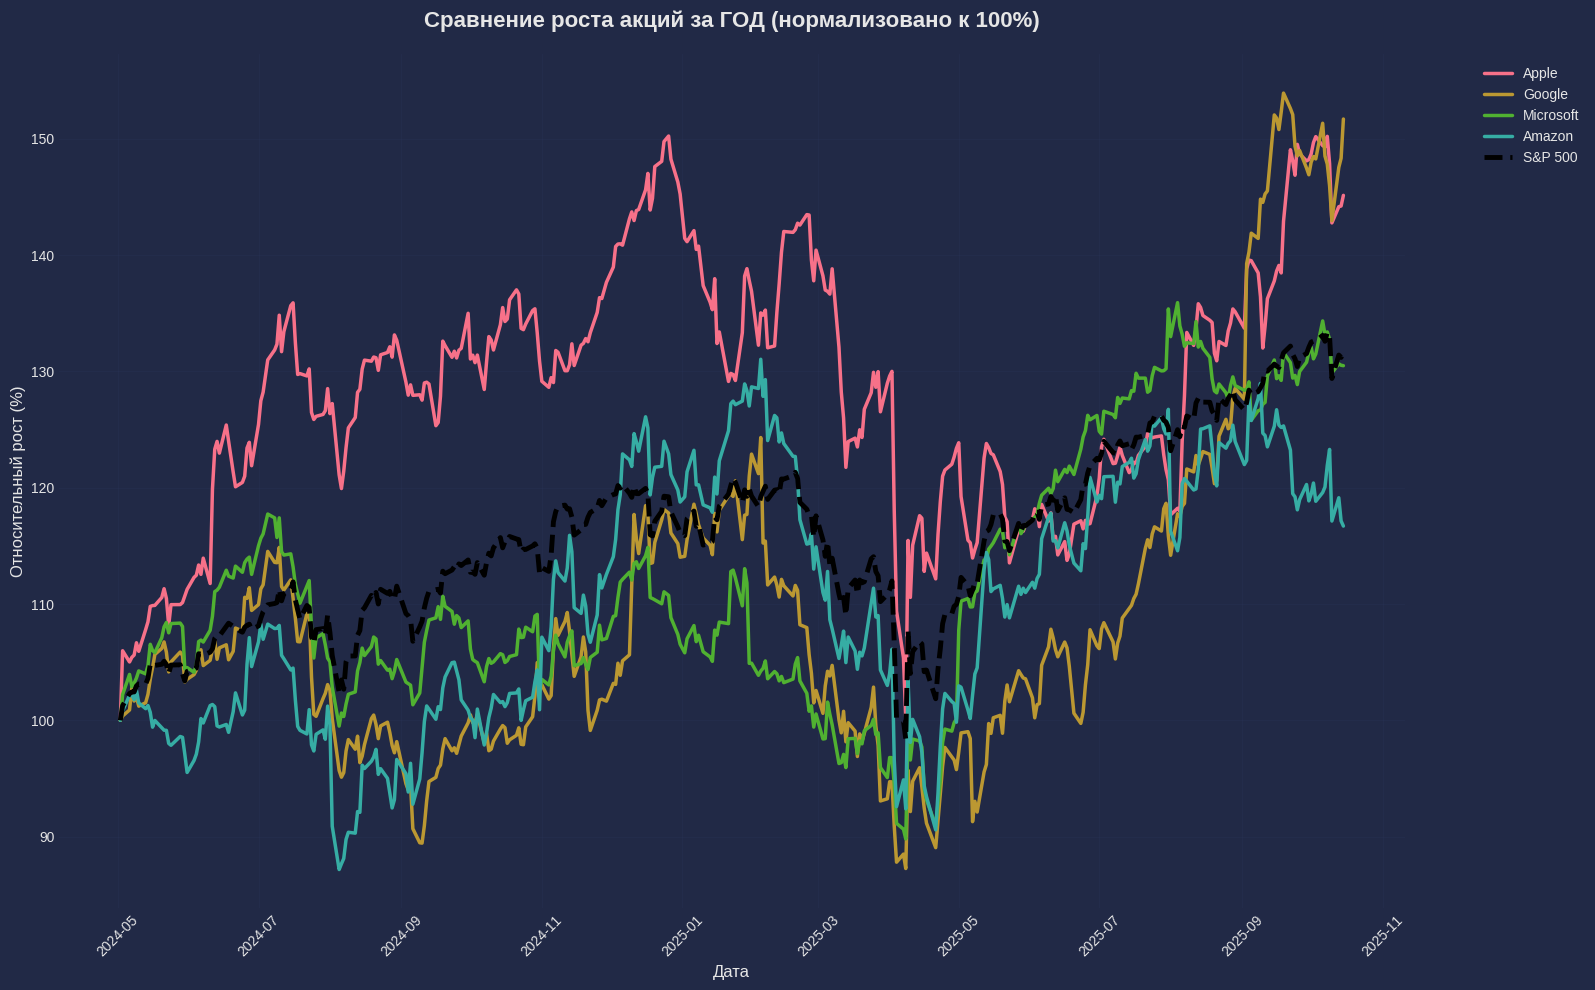

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
sns.set_palette("husl")


def get_stock_symbols():
    """
    Считывание тикеров акций, которые хотим проанализировать
    Возвращает список тикеров
    Если оставить поле пустым - вернет дефолтный набор
    """
    print("🎯 ВВЕДИТЕ ТИКЕРЫ АКЦИЙ ДЛЯ АНАЛИЗА")
    print("=" * 60)
    print("Примеры: AAPL, TSLA, GOOGL, MSFT, AMZN, META, NVDA, NFLX")
    print("Разделяйте символы запятыми или пробелами")
    print("Оставьте пустым для использования акций по умолчанию")
    print("=" * 60)

    user_input = input("Введите символы акций: ").strip()

    if not user_input:
        default_stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']  # набор акций по умолчанию
        print(f"Используются акции по умолчанию: {', '.join(default_stocks)}")
        return default_stocks

    symbols = [symbol.strip().upper() for symbol in user_input.replace(',', ' ').split()]   #обработка ввода

    symbols = list(dict.fromkeys(symbols))  # Удаляем дубликаты

    print(f"Выбраны акции: {', '.join(symbols)}")
    return symbols

def validate_stock_symbols(symbols:list):
    """
    Проверка символов на существование в Yahoo Finance
    Возвращает только существующие символы
    Если не существует ни одного - возвращает
    дефолтный набор символов
    """
    valid_symbols = []
    print("\nПРОВЕРКА ДОСТУПНОСТИ АКЦИЙ...")

    for symbol in symbols:
        try:
            stock = yf.Ticker(symbol)
            # Быстрая проверка через info
            info = stock.info
            if 'symbol' in info:
                valid_symbols.append(symbol)
                print(f"\t✅ {symbol}: доступен")
            else:
                print(f"\t❌ {symbol}: не найден")
        except:
            print(f"\t❌ {symbol}: ошибка при проверке")

    if not valid_symbols:
        print("\t⚠️ Не найдено ни одного валидного символа. Используются акции по умолчанию.")
        return ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

    return valid_symbols


def download_stock_data(symbols:list, period='2y'):
    """
    Скачивает данные акций с Yahoo Finance
    Возвращает DataFrame с ценами акций
    """
    data = {}
    for symbol in symbols:
        try:
            stock = yf.Ticker(symbol)
            hist = stock.history(period=period)
            if not hist.empty:
                data[symbol] = hist['Close']
                print(f"\t✅ {symbol}: загружено {len(hist)} дней")
            else:
                print(f"\t❌ Не удалось загрузить данные для {symbol}")
        except Exception as e:
            print(f"\t❌ Ошибка при загрузке {symbol}: {e}")

    return pd.DataFrame(data)


def fill_missing_values(df:pd.DataFrame):
    """
    Заполняет пропущенные значения предыдущей ценой (forward fill)
    """
    df_filled = df.copy()

    missing_before = df_filled.isnull().sum().sum()
    if missing_before > 0:
        print(f"\tНайдено пропущенных значений: {missing_before}")

        # Заполняем предыдущими значениями (forward fill)
        df_filled = df_filled.ffill()

        # Если остались пропуски в начале (backward fill)
        df_filled = df_filled.bfill()

        missing_after = df_filled.isnull().sum().sum()

        if missing_after == 0:
            print("\t✅ Все пропущенные значения заполнены предыдущими ценами")
        else:
            print(f"\t⚠️ Осталось необработанных пропусков: {missing_after}")
    else:
        print("\t✅ Пропущенные значения отсутствуют")

    return df_filled


def calculate_accurate_growth(df:pd.DataFrame, periods:dict):
    """
    Расчет процентного роста для различных периодов
    Возвращает DataFrame с процентным ростом
    """
    growth_data = {}

    current_date = df.index[-1]

    for period_name, days in periods.items():
        period_growth = {}

        # Находим дату начала периода
        start_date = current_date - timedelta(days=days)

        # Ищем ближайшую доступную дату к началу периода
        available_dates = df.index
        start_idx = available_dates.get_indexer([start_date], method='nearest')[0]

        for symbol in df.columns:
            current_price = df[symbol].iloc[-1]

            # Убеждаемся, что у нас достаточно данных для расчета
            if start_idx < len(df):
                start_price = df[symbol].iloc[start_idx]

                # Проверяем, что цены валидны
                if pd.notna(current_price) and pd.notna(start_price) and start_price > 0:
                    growth = ((current_price - start_price) / start_price) * 100
                    period_growth[symbol] = round(growth, 2)
                else:
                    period_growth[symbol] = None
            else:
                period_growth[symbol] = None

        growth_data[period_name] = period_growth

    growth_df = pd.DataFrame(growth_data)

    # Добавляем информацию о датах расчетов
    print(f"\tТекущая дата: {current_date.strftime('%Y-%m-%d')}")
    for period_name, days in periods.items():
        start_date = current_date - timedelta(days=days)
        actual_start_date = df.index[df.index.get_indexer([start_date], method='nearest')[0]]
        print(f"\t{period_name}: с {actual_start_date.strftime('%Y-%m-%d')}")

    return growth_df


def verify_growth_with_yahoo(symbol:str, period='1y'):
    """
    Проверяет расчет роста через прямое обращение к Yahoo Finance
    Возвращает значение роста от Yahoo
    """
    try:
        stock = yf.Ticker(symbol)
        hist = stock.history(period=period)

        if len(hist) > 1:
            start_price = hist['Close'].iloc[0]
            end_price = hist['Close'].iloc[-1]
            growth = ((end_price - start_price) / start_price) * 100
            return round(growth, 2)
        else:
            return None
    except:
        return None

# Получаем символы акций от пользователя
STOCKS = get_stock_symbols()
STOCKS = validate_stock_symbols(STOCKS)

# Основные настройки
MARKET_INDEX = '^GSPC'  # S&P 500 индекс
ALL_SYMBOLS = STOCKS + [MARKET_INDEX]

# Периоды для анализа (количество дней)
PERIODS = {
    'День': 1,
    'Неделя': 7,
    'Месяц': 30,
    'Год': 365
}

# Словарь названий компаний (расширяемый)
company_names = {
    'AAPL': 'Apple', 'GOOGL': 'Google', 'MSFT': 'Microsoft',
    'AMZN': 'Amazon', 'TSLA': 'Tesla', 'META': 'Meta',
    'NVDA': 'NVIDIA', 'NFLX': 'Netflix', 'IBM': 'IBM',
    'ORCL': 'Oracle', 'INTC': 'Intel', 'CSCO': 'Cisco',
    'AMD': 'AMD', 'BA': 'Boeing', 'DIS': 'Disney',
    '^GSPC': 'S&P 500'
}

# Добавляем названия для введенных пользователем акций
for stock in STOCKS:
    if stock not in company_names:
        # Пытаемся получить название компании через Yahoo Finance
        try:
            ticker = yf.Ticker(stock)
            info = ticker.info
            company_name = info.get('longName', stock)
            company_names[stock] = company_name
            print(f"ℹ️ Добавлено: {stock} - {company_name}")
        except:
            company_names[stock] = stock
            print(f"ℹ️ Используется символ как название: {stock}")

# Генерация даты дашборда
dashboard_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
print(f"\n📊 ДАШБОРД АНАЛИЗА АКЦИЙ")
print(f"\tДата создания: {dashboard_date}")
print(f"\tАнализируемые акции: {', '.join(STOCKS)}")
print(f"\tБенчмарк: S&P 500")

# Скачиваем данные
print("📥 Загрузка данных с Yahoo Finance...")
df_stocks = download_stock_data(ALL_SYMBOLS, period='2y')

if df_stocks.empty:
    raise Exception("\t❌ Не удалось загрузить данные")

# Обработка пропущенных значений
print("🔧 Обработка пропущенных значений...")
df_filled = fill_missing_values(df_stocks)

# Расчет процентного роста
print("📈 Периоды для расчета процентного роста")
growth_df = calculate_accurate_growth(df_filled, PERIODS)

# Добавляем информацию о компании
growth_df['Компания'] = growth_df.index.map(lambda x: company_names.get(x, x))
growth_df = growth_df[['Компания'] + list(PERIODS.keys())]

# Верификация данных с Yahoo Finance
print("\n🔍 ВЕРИФИКАЦИЯ ДАННЫХ")


verification_results = {}
for stock in STOCKS:
    yahoo_growth = verify_growth_with_yahoo(stock, '1y')
    our_growth = growth_df.loc[stock, 'Год']

    if yahoo_growth is not None:
        difference = abs(our_growth - yahoo_growth)
        status = "✅" if difference < 1 else "⚠️"
        print(f"{status} {company_names[stock]}: наш расчет {our_growth}% vs Yahoo {yahoo_growth}% (разница: {difference:.2f}%)")
        verification_results[stock] = {
            'our_calculation': our_growth,
            'yahoo': yahoo_growth,
            'difference': difference
        }

# Визуализация 1: Таблица роста
print("\n" + "="*80)
print("📊 ТАБЛИЦА ПРОЦЕНТНОГО РОСТА АКЦИЙ")
print("="*80)

styled_table = growth_df.style.format({
    'День': '{:+.2f}%',
    'Неделя': '{:+.2f}%',
    'Месяц': '{:+.2f}%',
    'Год': '{:+.2f}%'
}).background_gradient(cmap='RdYlGn', axis=0, subset=list(PERIODS.keys()))

display(styled_table)

# Визуализация 2: Сравнение с рынком
print("\n" + "="*80)
print("🔥 СРАВНЕНИЕ С РЫНКОМ (S&P 500)")
print("="*80)

# Рассчитываем outperformance/underperformance относительно рынка
market_growth = growth_df.loc[MARKET_INDEX, list(PERIODS.keys())].values
comparison_data = []

for stock in STOCKS:
    stock_growth = growth_df.loc[stock, list(PERIODS.keys())].values
    vs_market = stock_growth - market_growth
    comparison_data.append(vs_market)

comparison_df = pd.DataFrame(comparison_data,
                            index=[company_names[stock] for stock in STOCKS],
                            columns=PERIODS.keys())

# Создаем heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(comparison_df,
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',
            center=0,
            cbar_kws={'label': 'Превышение над рынком (%)'})
plt.title('Сравнение доходности акций с S&P 500\n(Положительное значение = акция обгоняет рынок)',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Сводная таблица цен
print("\n" + "="*80)
print("💰 СВОДКА ЦЕН ПО ПЕРИОДАМ")
print("="*80)

current_date = df_filled.index[-1]
indices = {
    'Текущая': -1,
    'День назад': -2,
    'Неделю назад': df_filled.index.get_indexer([current_date - timedelta(days=7)], method='nearest')[0],
    'Месяц назад': df_filled.index.get_indexer([current_date - timedelta(days=30)], method='nearest')[0],
    'Год назад': df_filled.index.get_indexer([current_date - timedelta(days=365)], method='nearest')[0]
}

summary_data = []
for symbol in ALL_SYMBOLS:
    symbol_data = {'Символ': symbol, 'Компания': company_names[symbol]}

    for period_name, idx in indices.items():
        try:
            price = df_filled[symbol].iloc[idx]
            symbol_data[period_name] = round(price, 2)
        except:
            symbol_data[period_name] = None

    summary_data.append(symbol_data)

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df[['Символ', 'Компания', 'Текущая', 'День назад', 'Неделю назад', 'Месяц назад', 'Год назад']]

summary_df = summary_df.ffill()

numeric_columns = ['Текущая', 'День назад', 'Неделю назад', 'Месяц назад', 'Год назад']
styled_summary = summary_df.style.format({
    'Текущая': '${:.2f}',
    'День назад': '${:.2f}',
    'Неделю назад': '${:.2f}',
    'Месяц назад': '${:.2f}',
    'Год назад': '${:.2f}'
}).background_gradient(cmap='Blues', subset=numeric_columns)

display(styled_summary)

# Анализ лучших и худших performers
print("\n" + "="*80)
print("🏆 ЛУЧШИЕ И ХУДШИЕ АКЦИИ ПО РОСТУ")
print("="*80)

# За год
best_year = growth_df.loc[STOCKS, 'Год'].idxmax()
worst_year = growth_df.loc[STOCKS, 'Год'].idxmin()

# За месяц
best_month = growth_df.loc[STOCKS, 'Месяц'].idxmax()
worst_month = growth_df.loc[STOCKS, 'Месяц'].idxmin()

print(f"📈 ЛУЧШИЕ ПЕРФОРМЕРЫ:")
print(f"   За год: {company_names[best_year]} ({growth_df.loc[best_year, 'Год']:+.2f}%)")
print(f"   За месяц: {company_names[best_month]} ({growth_df.loc[best_month, 'Месяц']:+.2f}%)")

print(f"\n📉 ХУДШИЕ ПЕРФОРМЕРЫ:")
print(f"   За год: {company_names[worst_year]} ({growth_df.loc[worst_year, 'Год']:+.2f}%)")
print(f"   За месяц: {company_names[worst_month]} ({growth_df.loc[worst_month, 'Месяц']:+.2f}%)")

print(f"\n📊 РЫНОК (S&P 500):")
print(f"   За год: {growth_df.loc[MARKET_INDEX, 'Год']:+.2f}%")
print(f"   За месяц: {growth_df.loc[MARKET_INDEX, 'Месяц']:+.2f}%")

# Графики
print("\n" + "="*80)
print("📈 ГРАФИКИ ИЗМЕНЕНИЯ ЦЕН АКЦИЙ")
print("="*80)

# Настройки для всех графиков
legend_settings = {
    'bbox_to_anchor': (1.05, 1),
    'loc': 'upper left',
    'fontsize': 10,
    'framealpha': 0.9
}

# График за год
plt.figure(figsize=(16, 10))
year_data = df_filled.tail(365)

for column in STOCKS:
    if column in year_data.columns:
        plt.plot(year_data.index, year_data[column], label=company_names[column], linewidth=2.5)

plt.title('Изменение цен акций за ГОДОВОЙ период', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Цена ($)', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.legend(**legend_settings)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Сравнительный график всех акций за год (нормализованный)
plt.figure(figsize=(16, 10))
year_data_normalized = (df_filled.tail(365) / df_filled.tail(365).iloc[0]) * 100

for column in STOCKS:
    if column in year_data_normalized.columns:
        plt.plot(year_data_normalized.index, year_data_normalized[column], label=company_names[column], linewidth=2.5)

plt.plot(year_data_normalized.index, year_data_normalized[MARKET_INDEX], label='S&P 500', linewidth=3.5, color='black', linestyle='--')

plt.title('Сравнение роста акций за ГОД (нормализовано к 100%)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Относительный рост (%)', fontsize=12)
plt.xlabel('Дата', fontsize=12)
plt.legend(**legend_settings)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
